In [154]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import fsolve

In [155]:
gamma = 1.2 #Valor de gama
p_e = np.array([101, 89.9, 79.5, 70.1, 61.7, 54.1, 47.2, 41.1, 35.7, 30.8]) #Valores retirados da ISA
p_crit = 856.7 #Pressão crítica
me_2 = -1/(gamma-1) + (1/((gamma-1)**2) + (2/(gamma-1))*((2/(gamma+1))**((gamma+1)/(gamma-1)))*((p_crit/(p_e*37))**2))**(1/2) #Fórmula do número de mach na saída do bocal
p0_pe_ratio = (1 + ((gamma-1)/2)*me_2)**(gamma/(gamma-1)) 
p02_p01_ratio = p0_pe_ratio*p_e/p_crit


In [156]:
p_e = p_e.tolist()
p02_p01_ratio = p02_p01_ratio.tolist()
m_res = np.zeros(len(p_e))
#Resolvendo a equação transcendental utilizando o fsolve
for i in range(len(p_e)):
    m_res[i] = fsolve(lambda m_1: - p02_p01_ratio[i] + (((gamma+1)*(m_1)**2)/(2+(gamma-1)*(m_1)**2))**(gamma/(gamma-1))*(((gamma+1)/(2*gamma*(m_1**2)-(gamma-1)))**(1/(gamma-1))),4.2)

In [157]:
print(m_res) #Conferindo os valores de m_1 obtidos
m_res = np.array(m_res) #Transformando a lista em ndarray para realizar outras operações

[3.50364094 3.58839145 3.67685413 3.76623664 3.85556821 3.94593815
 4.03762787 4.12788812 4.21615654 4.30362839]


In [158]:
a_at_ratio = np.sqrt((1/m_res**2)*((2/(gamma+1))*(1+((gamma-
1)/2)*m_res**2))**((gamma+1)/(gamma-1))) #Fórmula do Nozzle Area Ratio

In [159]:
print(a_at_ratio)
heights = np.arange(0, len(p_e)) #Criando a lista com as altitudes
print(heights)

[13.83157561 15.63466806 17.77025039 20.2250939  23.01587109 26.22701907
 29.9358813  34.08799192 38.69054134 43.84598042]
[0 1 2 3 4 5 6 7 8 9]


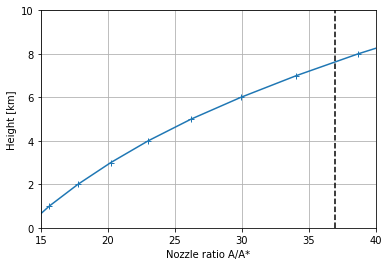

In [160]:
#Plotando o gráfico heights vs nozzle area ratio
plt.axvline(x=37, color="black",linestyle="--",linewidth=1.5)
plt.xlabel('Nozzle ratio A/A*')
plt.ylabel('Height [km]')
plt.plot(a_at_ratio, heights, marker = '+')
plt.xlim(15, 40)
plt.ylim(0,10)
plt.grid(True)